In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('Boston Marathon 2014.csv')

In [8]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [11]:
df['ctz'].describe()

count     1244
unique      84
top        GBR
freq       171
Name: ctz, dtype: object

In [13]:
df.drop('ctz', axis=1, inplace=True)

In [21]:
df['10k'] = pd.to_numeric(df['10k'], errors='coerce')
df['25k'] = pd.to_numeric(df['25k'], errors='coerce')
df['35k'] = pd.to_numeric(df['35k'], errors='coerce')
df['30k'] = pd.to_numeric(df['30k'], errors='coerce')
df['5k'] = pd.to_numeric(df['5k'], errors='coerce')
df['20k'] = pd.to_numeric(df['20k'], errors='coerce')
df['40k'] = pd.to_numeric(df['40k'], errors='coerce')
df['half'] = pd.to_numeric(df['half'], errors='coerce')


In [22]:
df['state'].isnull().sum()

2576

In [30]:
from sklearn.preprocessing import LabelEncoder
lb_maker = LabelEncoder()

In [28]:
df.dropna(inplace=True)

In [32]:
df['gender'] = lb_maker.fit_transform(df['gender'])
df['bib'] = lb_maker.fit_transform(df['bib'])
df['state'] = lb_maker.fit_transform(df['state'])
df['country'] = lb_maker.fit_transform(df['country'])
df['city'] = lb_maker.fit_transform(df['city'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 21 columns):
10k          29103 non-null float64
name         29103 non-null object
division     29103 non-null int64
25k          29103 non-null float64
gender       29103 non-null int64
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null int64
genderdiv    29103 non-null int64
35k          29103 non-null float64
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null int64
30k          29103 non-null float64
5k           29103 non-null float64
half         29103 non-null float64
20k          29103 non-null float64
country      29103 non-null int64
city         29103 non-null int64
40k          29103 non-null float64
25           29103 non-null float64
dtypes: float64(11), int64(9), object(1)
memory usage: 4.9+ MB


Data is clean, on to modeling

# Modeling

In [83]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [85]:
X = df[['gender','age','pace','official']]

In [86]:
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

In [96]:
Kmean = KMeans(n_clusters=3, random_state=101)
y_pred = Kmean.fit_predict(X_pca)

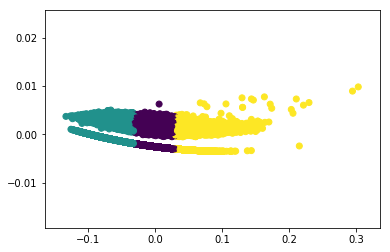

In [97]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [98]:
Kmean.cluster_centers_

array([[ 0.00051597, -0.00041816],
       [-0.06149514,  0.00029356],
       [ 0.05877776,  0.0002737 ]])

In [101]:
Kmean.labels_

array([2, 2, 0, ..., 1, 1, 2], dtype=int32)

In [103]:
df['Labels'] = Kmean.labels_

In [111]:
df[df['Labels']==0][['gender','age','overall','pace']].describe()

,gender,age,overall,pace
count,11753.000000,11753.000000,11753.000000,11753.000000
mean,0.479282,42.344763,15384.524207,9.078719
std,0.499592,8.510270,8840.579670,1.760429
min,0.000000,20.000000,19.000000,4.150000
25%,0.000000,36.000000,8006.000000,7.850000
50%,0.000000,42.000000,15715.000000,8.830000
75%,1.000000,48.000000,22704.000000,10.130000
max,1.000000,80.000000,31925.000000,17.470000


In [112]:
df[df['Labels']==1][['gender','age','overall','pace']].describe()

,gender,age,overall,pace
count,8511.000000,8511.000000,8511.000000,8511.000000
mean,0.365057,31.175890,21250.251087,10.493165
std,0.481474,7.169705,8741.082266,2.138873
min,0.000000,18.000000,48.000000,5.230000
25%,0.000000,26.000000,14481.500000,8.670000
50%,0.000000,30.000000,24096.000000,10.480000
75%,1.000000,36.000000,28612.500000,12.100000
max,1.000000,61.000000,31931.000000,20.570000


In [113]:
df[df['Labels']==2][['gender','age','overall','pace']].describe()

,gender,age,overall,pace
count,8839.000000,8839.000000,8839.000000,8839.000000
mean,0.773617,52.142663,11700.166874,8.344278
std,0.418514,7.899438,7338.226731,1.244245
min,0.000000,22.000000,1.000000,3.250000
25%,1.000000,47.000000,5499.500000,7.480000
50%,1.000000,52.000000,10968.000000,8.230000
75%,1.000000,57.000000,17300.500000,9.050000
max,1.000000,81.000000,31117.000000,13.980000
